### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

### Loading dataset

In [18]:
train_df = pd.read_csv('train.csv')
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


### EDA

In [3]:
train_df.shape

(8693, 14)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [5]:
#Checking for missing values

train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
#Checking value counts of each dataset columns

for feature in train_df.columns:
    print(f'The value count of {feature} are \n{train_df[feature].value_counts()}')
    print(100*'-')

The value count of PassengerId are 
0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64
----------------------------------------------------------------------------------------------------
The value count of HomePlanet are 
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
----------------------------------------------------------------------------------------------------
The value count of CryoSleep are 
False    5439
True     3037
Name: CryoSleep, dtype: int64
----------------------------------------------------------------------------------------------------
The value count of Cabin are 
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64
---------------------------------------------

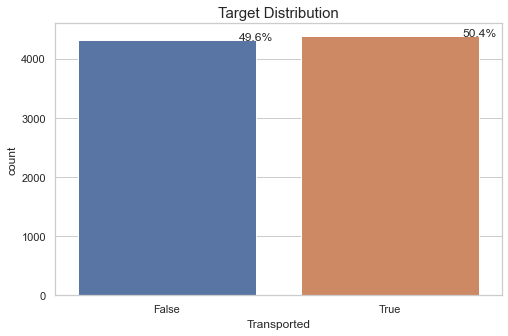

In [7]:
# Countplot of column 'Transported' with percentage

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(train_df['Transported']))
ax = sns.countplot(x="Transported", data=train_df)
plt.title('Target Distribution', fontsize=15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

The target is almost balanced. So, there won't be necessary for over/under sampling.

Text(0.5, 1.0, 'Home Planets')

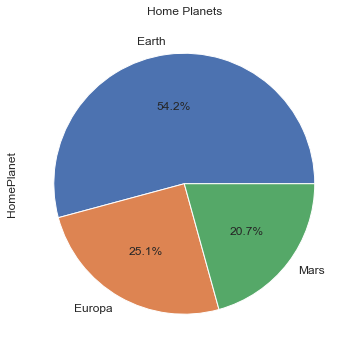

In [8]:
# Plotting passenger Home Planet using piechart 

plt.figure(figsize = (10,6))
train_df['HomePlanet'].value_counts().plot.pie(textprops={'fontsize' : 12},autopct='%1.1f%%').set_title('Home Planets')

There are 3 planets and majority passengers are from Earth then, Europa, followed by Mars.

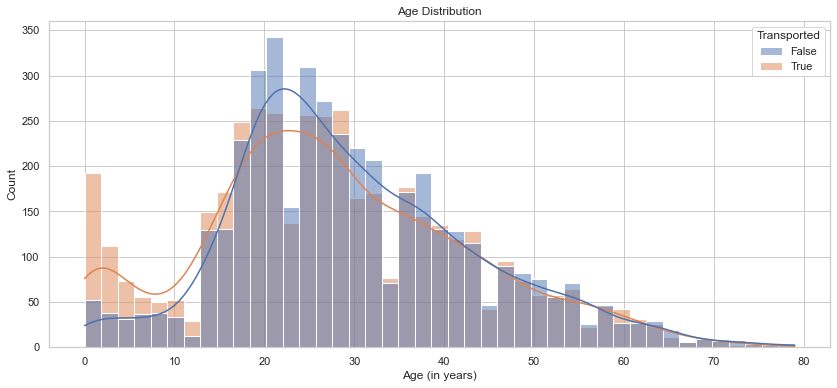

In [9]:
# Checking age distribution of passengers

plt.figure(figsize=(14,6))
sns.histplot(data=train_df, hue='Transported', x='Age', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age (in years)')
plt.show()

The age group of 0-20 years old were more likely to be transported than not being transported.

The age group of 20-30 years old were less likely to be transported than not being transported.

Above 30 years old were almost equally likely to be transported than not being transported.

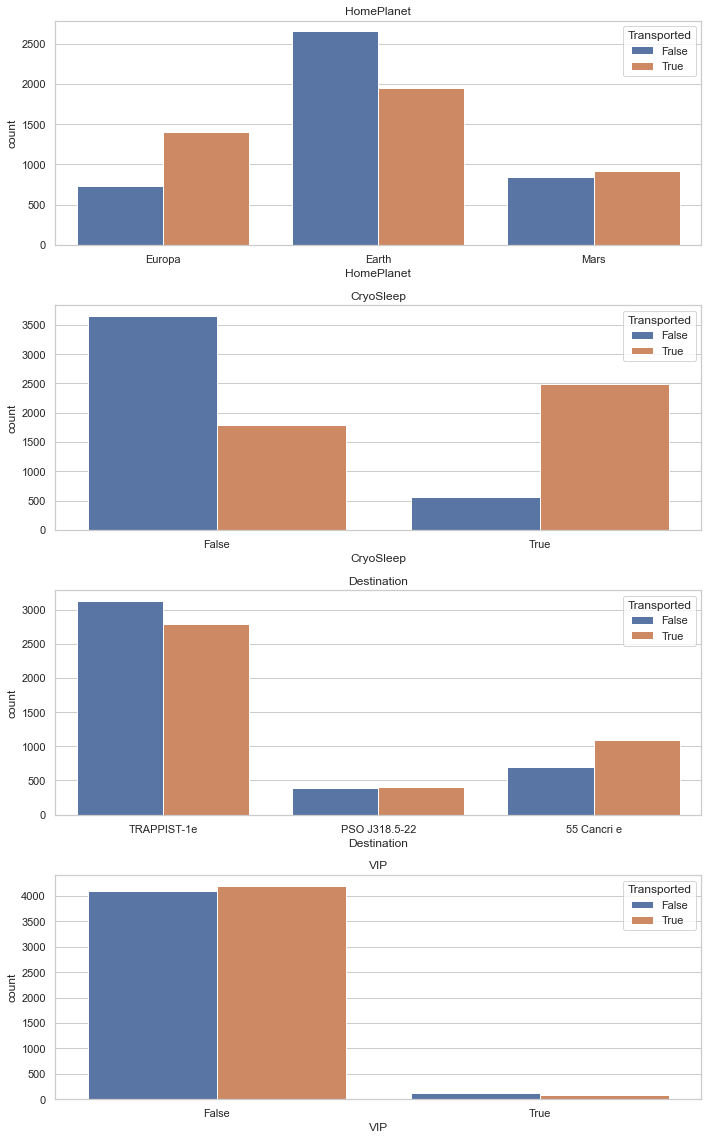

In [10]:
# Categorical features

cat_features=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plotting categorical features
fig=plt.figure(figsize=(10,16))
for i, feature in enumerate(cat_features):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train_df, x=feature, axes=ax, hue='Transported')
    ax.set_title(feature)
fig.tight_layout()
plt.show()

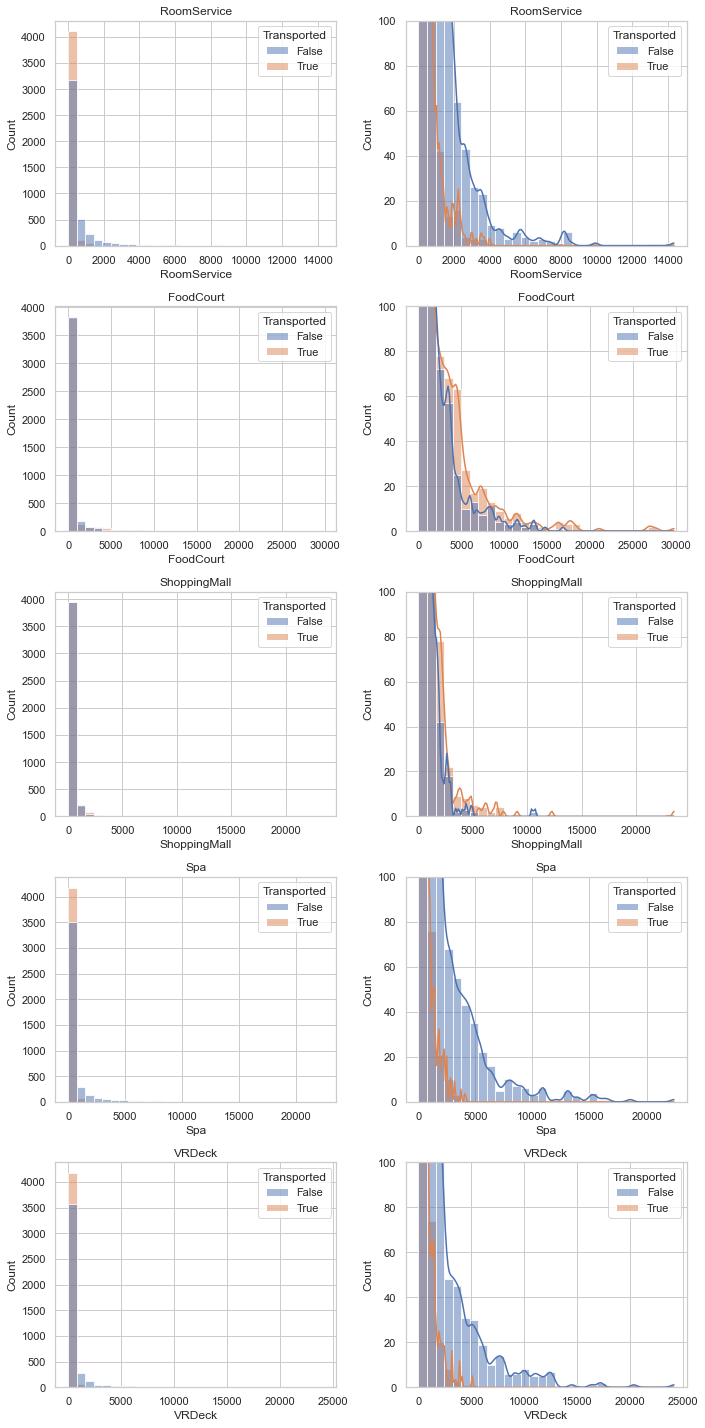

In [11]:
# Expenditure features

exp_features=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plotting expenditure features
fig=plt.figure(figsize=(10,20))
for i, feature in enumerate(exp_features):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train_df, x=feature, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(feature)
    
    # Right plot
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train_df, x=feature, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(feature)
fig.tight_layout() 
plt.show()

In [12]:
# Qualitative features

qual_features=['PassengerId', 'Cabin' ,'Name']

# Preview qualitative features
train_df[qual_features].head()

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines


Here we can consider PassengerId in the form of nnnn_pp where nnnn is which group the passenger is travelling  and pp is their number within the group.

The Cabin can be formed as deck/num/side, where there are two sides P and S. The P indicates Port and S indicates Starboard.

### Feature Engineering

Text(0.5, 1.0, 'Age Group distribution')

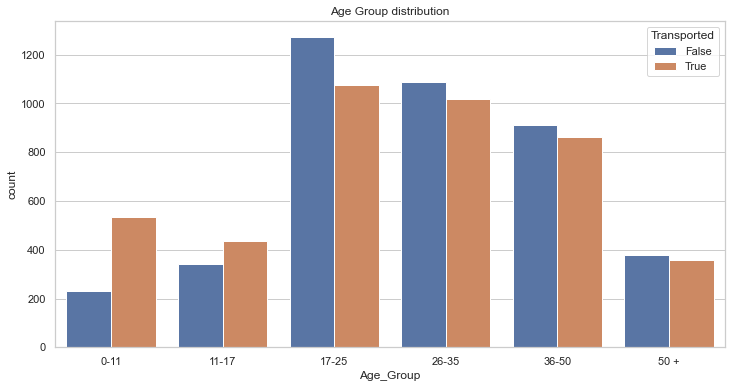

In [13]:
# Grouping the age of passengers 

train_df['Age_Group'] = np.nan
train_df.loc[train_df['Age'] <= 11, 'Age_Group'] = '0-11'
train_df.loc[(train_df['Age'] > 11) & (train_df['Age'] <= 17), 'Age_Group'] = '11-17'
train_df.loc[(train_df['Age'] > 17) & (train_df['Age'] <= 25), 'Age_Group'] = '17-25'
train_df.loc[(train_df['Age'] > 25) & (train_df['Age'] <= 35), 'Age_Group'] = '26-35'
train_df.loc[(train_df['Age'] > 35) & (train_df['Age'] <= 50), 'Age_Group'] = '36-50'
train_df.loc[train_df['Age'] > 50, 'Age_Group'] = '50 +'


# Plotting the grouped age 

plt.figure(figsize=(12,6))
sns.countplot(data = train_df, x = 'Age_Group', hue = 'Transported', order = ['0-11', '11-17', '17-25',
'26-35', '36-50', '50 +'])
plt.title('Age Group distribution')

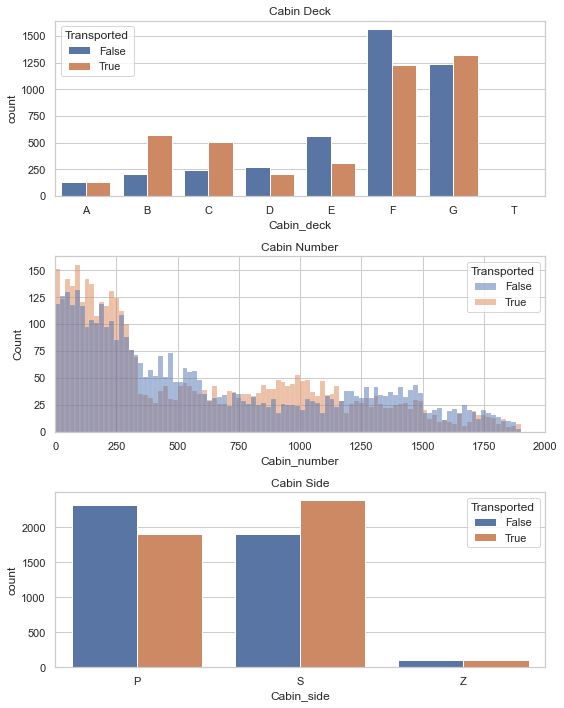

In [19]:
# Filling empty cabin columns and splitting them into three they are deck/number/side 
train_df['Cabin'].fillna('Z/9999/Z', inplace=True)

train_df['Cabin_deck'] = train_df['Cabin'].apply(lambda x : x.split('/')[0])
train_df['Cabin_number'] = train_df['Cabin'].apply(lambda x : x.split('/')[1]).astype(int)
train_df['Cabin_side'] = train_df['Cabin'].apply(lambda x : x.split('/')[2])

train_df.loc[train_df['Cabin_deck'] == 'Z', 'Cabin_deck'] == np.nan
train_df.loc[train_df['Cabin_number'] == 9999, 'Cabin_number'] == np.nan
train_df.loc[train_df['Cabin_side'] == 'Z', 'Cabin_side'] == np.nan

train_df.drop('Cabin', axis = 1, inplace =True)

# Plotting the splitted cabin 
graph, ax = plt.figure(figsize=(8,10))  # Cabin deck graph
plt.subplot(3,1,1)
sns.countplot(data = train_df, x = 'Cabin_deck', hue = 'Transported', order = ['A','B','C','D','E','F','G','T'])
plt.title('Cabin Deck')

plt.subplot(3,1,2)  # Cabin number graph
sns.histplot(data = train_df, x = 'Cabin_number', hue = 'Transported', binwidth = 20, ax = ax)
ax.set_xlim(1,2000)
plt.title('Cabin Number')
plt.xlim([0,2000])

plt.subplot(3,1,3)  # Cabin side graph
sns.countplot(data = train_df, x = 'Cabin_side', hue ='Transported')
plt.title('Cabin Side')
graph.tight_layout()

The graph of cabin deck, indicates only cabin 'T' has an outlier.

On 2nd graph(cabin number) we can see most of them are grouped into the 300 cabins. So, we can make this feature into categorical. 

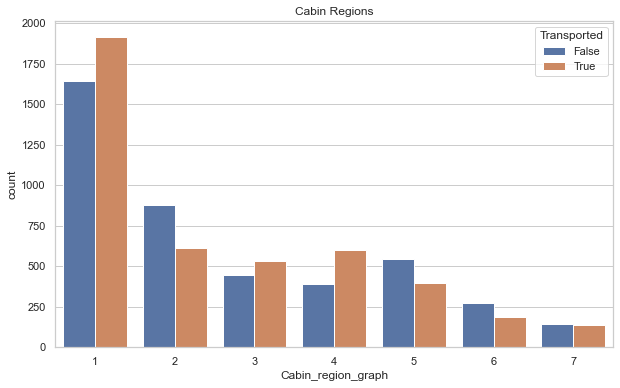

In [20]:
# 
train_df['Cabin_region1'] = (train_df['Cabin_number'] < 300).astype(int)   # one-hot encoding
train_df['Cabin_region2'] = ((train_df['Cabin_number'] >= 300) & (train_df['Cabin_number'] < 600)).astype(int)
train_df['Cabin_region3'] = ((train_df['Cabin_number'] >= 600) & (train_df['Cabin_number'] < 900)).astype(int)
train_df['Cabin_region4'] = ((train_df['Cabin_number'] >= 900) & (train_df['Cabin_number'] < 1200)).astype(int)
train_df['Cabin_region5'] = ((train_df['Cabin_number'] >= 1200) & (train_df['Cabin_number'] < 1500)).astype(int)
train_df['Cabin_region6'] = ((train_df['Cabin_number'] >= 1500) & (train_df['Cabin_number'] < 1800)).astype(int)
train_df['Cabin_region7'] = (train_df['Cabin_number'] >= 1800).astype(int)

plt.figure(figsize=(10,6))
train_df['Cabin_region_graph'] = (train_df['Cabin_region1'] + 2 * train_df['Cabin_region2'] + 3 * 
train_df['Cabin_region3'] + 4 * train_df['Cabin_region4'] + 5 * train_df['Cabin_region5'] + 6 * 
train_df['Cabin_region6'] + 7 * train_df['Cabin_region7']).astype(int)

sns.countplot(data = train_df, x = 'Cabin_region_graph', hue = 'Transported')
plt.title('Cabin Regions')
train_df.drop('Cabin_region_graph', axis = 1, inplace = True)

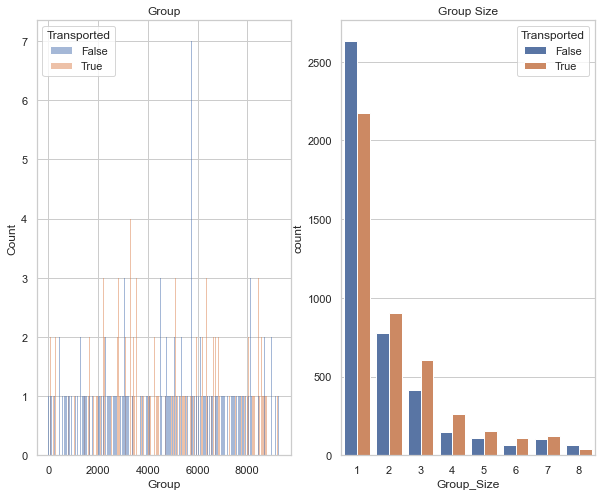

In [31]:
train_df['Group'] = train_df['PassengerId'].apply(lambda x : x.split('_')[0]).astype(int)
train_df['Group_Size'] = train_df['Group'].map(lambda x : train_df['Group'].value_counts()[x])

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.histplot(data = train_df, x = 'Group', hue = 'Transported', binwidth = 1)
plt.title('Group')

plt.subplot(1,2,2)
sns.countplot(data = train_df, x = 'Group_Size', hue = 'Transported')
plt.title('Group Size')
graph.tight_layout()

Text(0.5, 1.0, 'Passenger travels alone or not')

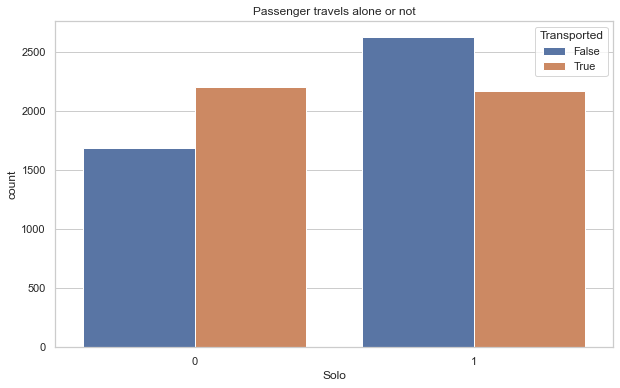

In [32]:
# Passenger who travels alone or not

train_df['Solo'] = (train_df['Group_Size'] == 1).astype(int)

plt.figure(figsize=(10,6))
sns.countplot(data = train_df, x = 'Solo', hue = 'Transported')
plt.title('Passenger travels alone or not')

Text(0.5, 1.0, 'Unspended')

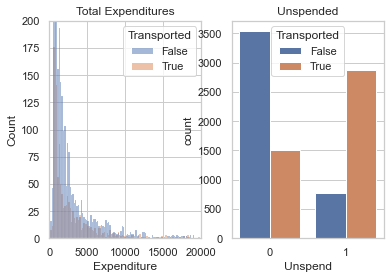

In [36]:
train_df['Expenditure'] = train_df[exp_features].sum(axis = 1)
train_df['Unspend'] = (train_df['Expenditure'] == 0).astype(int)

plt.subplot(1,2,1)
sns.histplot(data = train_df, x = 'Expenditure', hue = 'Transported', bins = 200)
plt.title('Total Expenditures')
plt.ylim([0,200])
plt.xlim([0,20000])

plt.subplot(1,2,2)
sns.countplot(data = train_df, x = 'Unspend', hue = 'Transported')
plt.title('Unspended')

### Missing value Treatment

In [9]:
# Splitting columns to fill missing values to different operations

mode_op = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination']
# Replacing null values with mode()

for feature in mode_op:
    train_df[feature].fillna(train_df[feature].mode()[0], inplace=True)


In [11]:
median_op = ['Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# Replacing null values with median()

for feature in median_op:
    train_df[feature].fillna(train_df[feature].median(), inplace=True)

In [12]:
# Seperating numerical and object columns

numericalColumns = train_df.select_dtypes(include=np.number).columns
print(f'List of numeric columns\n{numericalColumns}')

objectColumns = train_df.select_dtypes(include=np.object).columns
print(f'List of object columns \n{objectColumns}')

List of numeric columns
Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')
List of object columns 
Index(['HomePlanet', 'Cabin', 'Destination', 'VIP'], dtype='object')


In [13]:
for convert in numericalColumns:
    train_df[convert] = train_df[convert].astype(int)

In [14]:
train_df['CryoSleep'] = train_df['CryoSleep'].map({False : 0, True : 1})
train_df['CryoSleep'] = train_df['CryoSleep'].astype(int)

In [18]:
# Converting objects into integers using LabelEncoder
dataObjectDF = train_df[objectColumns]

defaultEncoder= defaultdict(LabelEncoder)

# variable enconding
fittrainObjectDF= dataObjectDF.apply(lambda x: defaultEncoder[x.name].fit_transform(x))

In [19]:
# Dropping the objectColumns and concatinating encoded variable to the dataset

train_df.drop(objectColumns, axis=1, inplace=True)
train_df = pd.concat([fittrainObjectDF, train_df], axis=1)

In [20]:
train_df['Cabin'].nunique()

6560

In [21]:
#dropping cabin because of too much distint values

train_df = train_df.drop(['Cabin'], axis=1)

In [22]:
train_df['Transported'] = train_df['Transported'].map({False : 0, True: 1})